In [5]:
import vk  # Загружаем библиотеку vk

In [6]:
token = "63e163d363e163d363e163d3af63929ca4663e163e163d33c849b30d5a14a8ec695bb76"  # Сервисный ключ доступа
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)

In [7]:
personal_token = "694665bc9f22c8045de619f7b0b7221abeacf1946fa2a4b15e22b5537b1d4bda98761659cc5f127a86d3e"  # Персональный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=personal_token)  # Авторизация
vk_personal_api = vk.API(session)  # Авторизация

In [8]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [9]:
members = get_members("afishapicnic")
                      
members[:10]
                      
                 

[{'id': 34,
  'first_name': 'Tatyana',
  'last_name': 'Plutalova',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 1,
  'domain': 'id34',
  'bdate': '2.6',
  'city': {'id': 2, 'title': 'Saint Petersburg'},
  'country': {'id': 1, 'title': 'Russia'}},
 {'id': 1100,
  'first_name': 'Artur',
  'last_name': 'Lomaraynen',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 2,
  'domain': 'id1100',
  'bdate': '21.11',
  'city': {'id': 221, 'title': 'Turku'},
  'country': {'id': 207, 'title': 'Finland'}},
 {'id': 1181,
  'first_name': 'Dusya',
  'last_name': 'Gorbovskaya',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 1,
  'domain': 'dusia',
  'bdate': '7.4',
  'city': {'id': 2, 'title': 'Saint Petersburg'},
  'country': {'id': 1, 'title': 'Russia'}},
 {'id': 1192,
  'first_name': 'Mikhail',
  'last_name': 'Morozov',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 2,
  'domain': 'mishka.morozov',
  'bdate': '8.1',
  'city': {'id': 2, 'title': 'Sain

In [10]:
len(members)

39644

In [11]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [12]:
save_members_to_file ("picnicafishi.saved_members.tsv", members)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import pandas as pd

df = pd.read_csv("picnicafishi.saved_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [15]:
df = df[df['name'] != 'DELETED']

In [16]:
df.head(10)

,id,name,surname,sex,birth,city,country
0,"34,",Tatyana,Plutalova,F,-,Saint Petersburg,Russia
1,"1100,",Artur,Lomaraynen,M,-,Turku,Finland
2,"1181,",Dusya,Gorbovskaya,F,-,Saint Petersburg,Russia
3,"1192,",Mikhail,Morozov,M,-,Saint Petersburg,Russia
4,"1242,",Philip,Denisenko,M,1988,Saint Petersburg,Russia
5,"1389,",Ivan,Bezborody,M,1986,Nizhny Novgorod,Russia
6,"1422,",Masha,Egorova,F,-,Saint Petersburg,Russia
7,"1434,",Iya,Bakuradze,F,-,-,Russia
8,"1570,",Anna,Bashilova,F,-,Saint Petersburg,Russia
9,"1607,",Olya,Smirnova,F,-,Saint Petersburg,Russia


In [17]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              13237
Saint Petersburg     3369
Nizhny Novgorod       495
Yekaterinburg         353
Voronezh              299
Kazan                 291
Samara                278
Rostov-on-Don         251
Krasnodar             220
Minsk                 209
Perm                  206
Kyiv                  176
Novosibirsk           175
Tula                  172
Yaroslavl             149
Ryazan                146
Ufa                   134
Volgograd             124
Chelyabinsk           121
Tver                  116
Name: city, dtype: int64


In [18]:
 39646 - 16607

23039

In [19]:
13238 + 3369

16607

In [20]:
pamskspb = 13238 + 3369

In [21]:
pamskspb+paprov

NameError: name 'paprov' is not defined

In [ ]:
#катя msk + spb 13259   prov 8267

In [ ]:
# алена мск спб 25946 про 24968

In [ ]:
# маша

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
barWidth = 0.25


In [ ]:
bars1 = [16609, 13259 , 25946, 8]
bars2 = [10367, 8267, 24968, 5, ]


In [ ]:
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


In [ ]:
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='blue', label='msk+spb')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='black', label='Province')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Пикник "Афиши', 'Боль', 'ParkLive', 'Bosco'])
plt.title('Распределение аудитории', fontsize=30)
plt.ylabel('Nb of fans', fontsize=25)
plt.xlabel('Fest', fontsize=25)
plt.xticks(rotation=60) # разворачиваем подписи под городами на 90 градусов
plt.legend(loc = 'upper right')
plt.show() # показываем изображение# your code hereplt.legend()



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import pandas as pd


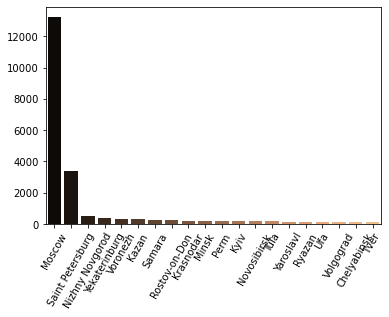

In [24]:
sns.barplot(city_count.index, city_count.values, palette='copper') # рисуем график, выбираем цвет
plt.xticks(rotation=60) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

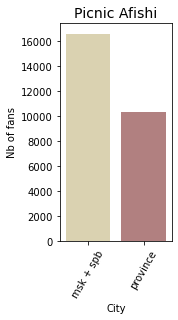

In [32]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Saint Petersburg')] = "msk + spb"
df.loc[(df['city'] != "msk + spb") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
plt.figure(figsize=(2, 4)) #размер картинки
ax = sns.barplot(city_count.index,city_count.values, palette='pink_r') # рисуем график, выбираем цвет
plt.title('Picnic Afishi', fontsize=14)
plt.ylabel('Nb of fans', fontsize=10)
plt.xlabel('City', fontsize=10)
plt.xticks(rotation=60) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение# your code here


In [26]:
with open("../Our_project-main/boscofreshfest.txt", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("../Our_project-main/bolbfest_members", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("../Our_project-main/picnicafishi.saved_members.tsv", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

with open("../Our_project-main/parklive_members.tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")


In [300]:
members3 = set(members3)
members1 = set(members1)
members2 = set(members2)
members4 = set(members4)

members3.remove("")

In [301]:
united_members = members1.union(members2).union(members3).union(members4)


In [302]:
with open ("united_members.tsv", "w",  encoding='utf-8') as f:
    for i in united_members:
        f.write(i + "\n")

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
import pandas as pd



In [307]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              27743
Москва              19934
Saint Petersburg     6475
Санкт-Петербург      6015
Нижний Новгород      1087
Nizhny Novgorod       856
Екатеринбург          759
Yekaterinburg         710
Воронеж               708
Самара                671
Краснодар             644
Казань                615
Voronezh              571
Ростов-на-Дону        568
Minsk                 562
Kazan                 554
Rostov-on-Don         506
Samara                498
Минск                 449
Новосибирск           449
Name: city, dtype: int64


In [310]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)


In [311]:
with open("intersected_members.tsv", "w", encoding="utf-8") as w:
    for i in intersected_members:
        w.write(i+"\n")

In [312]:
import pandas as pd

df = pd.read_csv("intersected_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [313]:
df = df[df["name"] != "DELETED"]


In [314]:
df = df[df["name"] != "DELETED"]


In [315]:
df.head(100)


,id,name,surname,sex,birth,city,country
2,"8090090,",Mary,Stepanenko,F,-,-,-
3,"559929829,",Ann,Nomad,F,2000,-,-
4,"380354715,",All,Fest,M,1973,-,-
6,"20197498,",Regina,George,F,-,-,-
7,"275745687,",Konchalovsky,Anastasia,F,-,-,-
9,"246310088,",Helena,Bloomquist,F,-,-,-
11,"495923691,",Electrojam,Info,M,-,-,-
12,"2209816,",Anastasia,Filippova,F,-,-,-
13,"245228950,",Gleb,Kudryavtsev,M,-,-,-
14,"390444756,",Roman,Aynutdinov,M,-,-,-


In [316]:
import pandas as pd

df = pd.read_csv("picnicafishi.saved_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [317]:
df.head(11)


,id,name,surname,sex,birth,city,country
0,"34,",Tatyana,Plutalova,F,-,Saint Petersburg,Russia
1,"1100,",Artur,Lomaraynen,M,-,Turku,Finland
2,"1181,",Dusya,Gorbovskaya,F,-,Saint Petersburg,Russia
3,"1192,",Mikhail,Morozov,M,-,Saint Petersburg,Russia
4,"1242,",Philip,Denisenko,M,1988,Saint Petersburg,Russia
5,"1389,",Ivan,Bezborody,M,1986,Nizhny Novgorod,Russia
6,"1422,",Masha,Egorova,F,-,Saint Petersburg,Russia
7,"1434,",Iya,Bakuradze,F,-,-,Russia
8,"1570,",Anna,Bashilova,F,-,Saint Petersburg,Russia
9,"1607,",Olya,Smirnova,F,-,Saint Petersburg,Russia


In [113]:
import vk


In [115]:
token = "63e163d363e163d363e163d3af63929ca4663e163e163d33c849b30d5a14a8ec695bb76"  # Сервисный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)  # Авторизация

In [116]:
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return data

NameError: name 'owner_id' is not defined

In [117]:
posts = get_posts("afishapicnic")


In [118]:
from datetime import datetime


In [120]:
for i in posts:    
    print(i['text']) #тексты
    
    print('likes:', i['likes']['count']) # количество  лайков
    print('reposts:', i['reposts']['count'])  # количество  репостов
    print('comments:', i['comments']['count'])  # количество  комментариев
    
    date = datetime.fromtimestamp(i['date'])
    print(date.year, date.day, date.month)
    
    print("==========")


TypeError: string indices must be integers

In [88]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [89]:
posts = get_posts("afishapicnic")
                      
posts[:10]

['Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем! \nПикник «Афиши»',
 'Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!\n\nhttps://www.youtube.com/watch?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9',
 'Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в

In [128]:
import re


In [129]:
pattern_link = re.compile(r"[A-z0-9]+[:/\.]+[A-z0-9]+[\./]+[A-z0-9]+[A-z0-9\./]+\b")

In [130]:
def replace_weblinks(posts):
    return re.sub(pattern_link, "WEBLINK", posts)
posts = [replace_weblinks(post) for post in posts] 


In [131]:
posts

['Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем! \nПикник «Афиши»',
 'Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!\n\nWEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9',
 'Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в курсе!\n\nНе поддавай

In [132]:
pattern_mention = re.compile(r"[\(\[]+[a-z0-9]+\|[A-z0-9 А-я'\/\(\)\"]+[\]()]")

In [133]:
def replace_mentions(posts):
    return re.sub(pattern_mention, "MENTION", posts)

In [134]:
posts = [replace_mentions(post) for post in posts]
print(posts)

['Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем! \nПикник «Афиши»', 'Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!\n\nWEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9', 'Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в курсе!\n\nНе поддавайте

In [135]:
def clean_text(posts):
    posts = re.sub(pattern_link, "WEBLINK", posts)
    posts = re.sub(pattern_mention, "MENTION", posts)
    posts = posts.replace("\n", " ")
    return posts
with open('texts.txt', 'w', encoding="utf-8") as f:
    for post in posts:
        cleaned = clean_text(post)
        f.write(cleaned+"\n")

In [136]:
posts = "".join(posts)

In [137]:
posts

'Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем! \nПикник «Афиши»Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!\n\nWEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в курсе!\n\nНе поддавайтесь панике

In [138]:
words_re = [i.strip() for i in re.split(r"([ \.\?!,]{1,})", posts) if i.strip()] # и это повторяется от 1 до бесконечности раз
print(words_re)

['Вы', 'все', 'ждете', 'от', 'нас', 'новостей', '—', 'будет', 'ли', 'Пикник-2020', '?', 'Отвечаем', 'честно:', '8', 'августа', '—', 'уже', 'точно', 'нет', '.', 'Мы', 'мечтаем', 'встретиться', 'со', 'всеми', 'в', 'этом', 'году', ',', 'чтобы', 'слушать', 'любимых', 'артистов', ',', 'танцевать', 'и', 'валяться', 'на', 'траве', ',', 'как', 'делали', 'это', '16', 'лет', '.', 'Однако', 'пока', 'просто', 'не', 'знаем', ',', 'будет', 'ли', 'такая', 'возможность', '.', 'Мы', 'каждый', 'день', 'рисуем', 'карты', ',', 'ищем', 'решения', 'для', 'безопасности', 'гостей', 'и', 'ждем-ждем', 'официальной', 'информации', ',', 'как', 'только', 'все', 'узнаем', '—', 'сразу', 'вам', 'расскажем', '!', 'Очень', 'скучаем', '!', 'Пикник', '«Афиши»Набирайтесь', 'сил', 'перед', 'выходными', ',', 'ведь', 'на', 'вечеринке', 'имени', 'себя', 'вы', 'и', 'бармен', ',', 'и', 'диджей', ',', 'и', 'толпа', '.', 'Мы', 'поможем:', '100', 'лучших', 'музыкальных', 'видео', ',', 'подобранных', 'командой', 'Пикника', '"Афиши"

In [139]:
from pymystem3 import Mystem

In [140]:
def lemmatize_text(posts):
    m = Mystem()
    lemmas = m.lemmatize(posts)
    lemmatized_text = ''.join(lemmas)
    return lemmatized_text

In [141]:
lemmatize_text(posts)

'вы весь ждать от мы новость — быть ли пикник-2020? отвечать честно: 8 август — уже точно нет. мы мечтать встречаться со все в этот год, чтобы слушать любимый артист, танцевать и валяться на трава, как делать это 16 год. однако пока просто не знать, быть ли такой возможность. мы каждый день рисовать карта, искать решение для безопасность гость и ждать-ждать официальный информация, как только весь узнавать — сразу вы рассказывать! очень скучать! \nпикник «афиша»набираться сила перед выходной, ведь на вечеринка имя себя вы и бармен, и диджей, и толпа. мы помогать: 100 хороший музыкальный видео, подбирать команда пикник "афиша", уже на канал в Youtube!\n\nWEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9Друзья! анонс пикник «афиша» откладываться на некоторый время. мы делать весь возможный, чтобы хороший фестиваль город проходить в обычный режим. и чтобы в август вы по наш старый традиция танцевать на газон коломенский. быть держать в курс!\n\nне поддаваться паника, беречь себ

In [142]:
import emoji
from collections import Counter

class Preprocessing:
    def __init__(self, text):
        self.text = text
    
    def get_sentences(self):
        return [i.strip() for i in self.text.replace("!", ".").replace("?", ".").replace("...", ".").replace(".\n", ". ").split(". ")]
    
    def get_words(self):
        return [i.strip(".,!?") for i in self.text.split()]
        
    def get_counted_words(self):
        words = {}
        for word in self.text.lower().split():
            if word in words:
                words[word] += 1
            else:
                words[word] = 1
        return words
    
    def get_emojis(self):
        return set([i for i in self.text if i in emoji.UNICODE_EMOJI])

In [143]:
preprocess = Preprocessing(posts)

In [144]:
s = preprocess.get_words()

In [145]:
s

['Вы',
 'все',
 'ждете',
 'от',
 'нас',
 'новостей',
 '—',
 'будет',
 'ли',
 'Пикник-2020',
 'Отвечаем',
 'честно:',
 '8',
 'августа',
 '—',
 'уже',
 'точно',
 'нет',
 'Мы',
 'мечтаем',
 'встретиться',
 'со',
 'всеми',
 'в',
 'этом',
 'году',
 'чтобы',
 'слушать',
 'любимых',
 'артистов',
 'танцевать',
 'и',
 'валяться',
 'на',
 'траве',
 'как',
 'делали',
 'это',
 '16',
 'лет',
 'Однако',
 'пока',
 'просто',
 'не',
 'знаем',
 'будет',
 'ли',
 'такая',
 'возможность',
 'Мы',
 'каждый',
 'день',
 'рисуем',
 'карты',
 'ищем',
 'решения',
 'для',
 'безопасности',
 'гостей',
 'и',
 'ждем-ждем',
 'официальной',
 'информации',
 'как',
 'только',
 'все',
 'узнаем',
 '—',
 'сразу',
 'вам',
 'расскажем',
 'Очень',
 'скучаем',
 'Пикник',
 '«Афиши»Набирайтесь',
 'сил',
 'перед',
 'выходными',
 'ведь',
 'на',
 'вечеринке',
 'имени',
 'себя',
 'вы',
 'и',
 'бармен',
 'и',
 'диджей',
 'и',
 'толпа',
 'Мы',
 'поможем:',
 '100',
 'лучших',
 'музыкальных',
 'видео',
 'подобранных',
 'командой',
 'Пикни

In [146]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [147]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words) # чтобы слова не повторялись, а в сете неп овтоярюстя слова плюс питон быстрее ищет в сетах, а не в списках

In [148]:
clean_posts = [word for word in posts if word not in stop_words]

In [149]:
words = word_tokenize(posts) #делит текст по пробелама
len(words)

64486

In [150]:
words[:10]

['Вы',
 'все',
 'ждете',
 'от',
 'нас',
 'новостей',
 '—',
 'будет',
 'ли',
 'Пикник-2020']

In [151]:
words = [i for i in words if i.isalnum()] #убираем !"" ())
len(words)

49720

In [152]:
len(Counter(words))

13453

In [153]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words) # чтобы слова не повторялись, а в сете неп овтоярюстя слова плюс питон быстрее ищет в сетах, а не в списках

In [154]:
clean_words = [word for word in words if word not in stop_words]

In [155]:
Counter(clean_words).most_common(30)

[('Афиши', 442),
 ('MENTION', 375),
 ('Пикнике', 359),
 ('Пикник', 354),
 ('Пикника', 339),
 ('WEBLINK', 240),
 ('Билеты', 195),
 ('билеты', 143),
 ('комиссии', 137),
 ('августа', 122),
 ('В', 120),
 ('На', 110),
 ('Коломенском', 103),
 ('билет', 99),
 ('А', 93),
 ('купить', 92),
 ('фестиваля', 89),
 ('июля', 87),
 ('The', 84),
 ('Мы', 67),
 ('главной', 67),
 ('сайте', 67),
 ('рублей', 66),
 ('сцене', 66),
 ('Коломенское', 63),
 ('площадке', 63),
 ('И', 60),
 ('Здесь', 57),
 ('сцены', 56),
 ('фестиваль', 55)]

In [279]:
!pip install natasha




In [163]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [164]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [165]:
doc = Doc(posts)
doc.segment(segmenter)

In [166]:
[i.text for i in doc.sents]

['Вы все ждете от нас новостей — будет ли Пикник-2020?',
 'Отвечаем честно: 8 августа — уже точно нет.',
 'Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет.',
 'Однако пока просто не знаем, будет ли такая возможность.',
 'Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем!',
 'Очень скучаем!',
 'Пикник «Афиши»']

In [167]:
print([i.text for i in doc.tokens])

['Вы', 'все', 'ждете', 'от', 'нас', 'новостей', '—', 'будет', 'ли', 'Пикник-2020', '?', 'Отвечаем', 'честно', ':', '8', 'августа', '—', 'уже', 'точно', 'нет', '.', 'Мы', 'мечтаем', 'встретиться', 'со', 'всеми', 'в', 'этом', 'году', ',', 'чтобы', 'слушать', 'любимых', 'артистов', ',', 'танцевать', 'и', 'валяться', 'на', 'траве', ',', 'как', 'делали', 'это', '16', 'лет', '.', 'Однако', 'пока', 'просто', 'не', 'знаем', ',', 'будет', 'ли', 'такая', 'возможность', '.', 'Мы', 'каждый', 'день', 'рисуем', 'карты', ',', 'ищем', 'решения', 'для', 'безопасности', 'гостей', 'и', 'ждем-ждем', 'официальной', 'информации', ',', 'как', 'только', 'все', 'узнаем', '—', 'сразу', 'вам', 'расскажем', '!', 'Очень', 'скучаем', '!', 'Пикник', '«', 'Афиши', '»']


In [168]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [169]:
print([i.lemma for i in doc.tokens])

['вы', 'все', 'ждать', 'от', 'мы', 'новость', '—', 'быть', 'ли', 'пикник-2020', '?', 'отвечать', 'честно', ':', '8', 'август', '—', 'уже', 'точно', 'нет', '.', 'мы', 'мечтать', 'встретиться', 'с', 'весь', 'в', 'этот', 'год', ',', 'чтобы', 'слушать', 'любимый', 'артист', ',', 'танцевать', 'и', 'валяться', 'на', 'трава', ',', 'как', 'делать', 'это', '16', 'год', '.', 'однако', 'пока', 'просто', 'не', 'знать', ',', 'быть', 'ли', 'такой', 'возможность', '.', 'мы', 'каждый', 'день', 'рисовать', 'карта', ',', 'искать', 'решение', 'для', 'безопасность', 'гость', 'и', 'ждать-ждать', 'официальный', 'информация', ',', 'как', 'только', 'весь', 'узнавать', '—', 'сразу', 'вы', 'рассказать', '!', 'очень', 'скучать', '!', 'пикник', '«', 'афиша', '»']


In [170]:
doc.tag_ner(ner_tagger)

In [171]:
for span in doc.spans:
    print(posts[span.start:span.stop], span.type)

Пикник-2020 PER
Афиши ORG


In [172]:
with open("posts_PA.txt", 'w', encoding="utf-8") as w:
    for i in posts:
        w.write(i+"\n")

In [173]:
locations = set()
persons = set()
organizations = set()

with open("texts.txt", 'r', encoding="utf-8") as f:
    for line in f:
        posts = line.strip()
        
        doc = Doc(posts)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [174]:
print(locations)

{'Шанхай', 'Нижний Новгород', 'Зарядье', 'Гарлем', 'Маркета', 'Парк Горький', 'Кассир', 'Нигерия', 'Россия', 'Германия', 'Индия', 'Ростов-на-Дону', 'Рейкьявик', 'Швеция', 'Нева', 'Новая Голландия', 'Ганновер', 'Коломенский Водная', 'Камал Уильямс', 'Напоминающие', 'Мельбурн', 'Канада', 'Коломенская', 'ВАО', 'Бельгия', 'Петербург', 'Гернси', 'Москва', 'Дохи', 'Америка', 'Варшава', 'А-лаунж', 'Мексика', 'Пикнике', 'Горький', 'Брайтон Бич', 'Атланта', 'Юг', 'Рамблер-Кассе (WEBLINK)', 'Теофилуса Лондон', 'Гватемала', 'Токио', 'Коломенское', 'Коломенский пикник', 'Самара', 'Питер', 'США', 'Киев', 'Да Винчи', 'Даниловский рынок', 'Гана', 'Зона отдых', 'Сибирь', 'Коломенское велопарковка', 'Фудкорт', 'Пикника', 'Норвегия', 'Гластонбери', 'Маркете Пикник', 'Ленинград', 'Москва-река', 'Комсомольский проспект', 'Коломенским', 'Коньково', 'Казахстан', 'Пемп', 'Диснейленд', 'Ступино', 'Маркет Пикника', 'Крымск', 'Петровка', 'Хамовниках', 'Брайтон', 'Солянка', 'Коломенский Пикника', 'Англия', 'Шухо

In [175]:
print(persons)

{'Чагин', 'Вера Павлова', 'Филипп Киркоров', 'Кирилл Иванов', 'Афиша-Город\u200b', 'Лорин Хилл', 'Окси', 'Пабло Гарсия', 'Кандинский', 'Антон Желнов', 'Барбекю-бургер', 'Павел Копылков', 'Пикнике', 'Хансон', 'Инстаграм', 'Гоголь-Центр', 'Катя', 'Снарядите', 'Алессандры Амбросио', 'Чак Норрис', 'Вацлав Клемент', 'Карина Истомину', 'Артем Сучков', 'Хайди Клум', 'Ирой Га', 'Кирилл Рихтер', 'Рома', 'Девид Боуи', 'Марвину Гэю', 'Мириам Сехон', 'Рубик', 'Леонардо', 'Вероника Шрамко', 'Вера Полозкова', 'Дорн', 'Кинопроект', 'Джейкоб Грэм', 'Oddisee', 'Пикника-2019', 'Мини-подборка', 'Пикник-2015', 'Принцесса Пич', 'Кузьмич', 'Евгения Борзых', 'Роберт Паттинсон', 'Елена Ванина', 'Валерия Давыдова', 'Канье', 'Тандеркэт', 'Муджуса', 'Мот', 'Смит', 'Дмитрий Мельник', 'Глеб Солнцев', 'Эндрю ВанВингарденом', 'Ксения Башмет', 'Анна Назарова', 'Энди Босуэлл', 'Диккенс', 'Наадя', 'Андрей Маковскому', 'Юлия Волкова', 'Марио', 'Лео', 'Брет Андерсон', 'Ян Шванкмайер', 'Пирумов', 'Пикника-2011', 'Аня Биче

In [176]:
print(organizations)

{'Практика', 'СПБЧ', 'Nicodemus', 'ВКонтакте', 'Skepta', 'FAQ', 'ВДНХ', 'Букмейт', 'Эксмо', 'Edutainment Space', 'Олимпийский', 'Афиша помогающий', 'Everything Everything', 'Sampha', 'Территория кино', 'Bosch Game Zone', 'Яндекс', 'Coldplay', 'Chop-Chop', 'Рамблер Касса WEBLINK/', 'ТНТ', 'Etiquette', 'Специальная зона', 'Фонд Константин Хабенский', 'Corner Burger', 'MGMT', 'La Boule Petanque', 'Афиши Daily', 'QBIK', 'Центр «Антон тут рядом', 'Sony', 'Московский музей современное искусство', 'Zangavar', 'Универмаг', 'Помощь.ру', 'Афиша Daly', 'Второе Дыхание', 'Центр', 'Hot Chip', 'Мемориал', 'H&M Loves Music', 'Noor Electro', 'Pompeya', 'L33T', 'Thе Retuses', 'Summer stage', 'Эколайн', 'SUP', 'Оргкомитет Пикник «Афиша', 'Miracle Libido', 'Sedatec', 'Универмаг «Цветной', 'La Boule', 'Oddisee', 'iTunes', 'Kate NV', 'Birdie', 'Orlando Julius', 'Secret Walls', 'Пионер', 'Мегаполис', 'Английская Премьер-лига', 'Мот', 'VK Talents', 'Deeper Underground', 'Oscar and the Wolf', 'КМ20', 'Trends 